Importing the relevant packages
We will make heavy use of the pandas library for all kinds of data processing tasks, matplotlib shall be used for visualisations!

Also we shall set the style of the notebook to make it better for reading!

In [1]:
import sys
import pandas as pd
import numpy as np
from functools import reduce

%matplotlib inline

Reading School Data from .xls files

In [2]:
middle_mix = pd.read_excel("data/middle_school_rural_urban.xls")


WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


Describing Data and checking what we have in data

In [3]:
#Head function will show first five rows
middle_mix.head()

,Sl. No.,STATE/U.T.,Enrolment in Class VI - Boys,Enrolment in Class VI - Girls,Enrolment in Class VI - Total,Enrolment in Class VII - Boys,Enrolment in Class VII - Girls,Enrolment in Class VII - Total,Enrolment in Class VIII - Boys,Enrolment in Class VIII - Girls,Enrolment in Class VIII - Total,Enrolment in Class VI toVIII - Boys,Enrolment in Class VI toVIII - Girls,Enrolment in Class VI toVIII - Total
0,1,Andaman Nicobar Islands,3930,3637,7567,3970,3585,7555,3729,3477,7206,11629,10699,22328
1,2,Andhra Pradesh,621265,593143,1214408,607580,583275,1190855,573051,549886,1122937,1801896,1726304,3528200
2,3,Arunachal Pradesh,15789,15397,31186,14483,13415,27898,14256,12925,27181,44528,41737,86265
3,4,Assam,254324,260134,514458,248654,258919,507573,222268,236016,458284,725246,755069,1480315
4,5,Bihar,752481,655494,1407975,674457,589281,1263738,598842,523892,1122734,2025780,1768667,3794447


In [4]:
#tail function will show last five rows
middle_mix.tail()

,Sl. No.,STATE/U.T.,Enrolment in Class VI - Boys,Enrolment in Class VI - Girls,Enrolment in Class VI - Total,Enrolment in Class VII - Boys,Enrolment in Class VII - Girls,Enrolment in Class VII - Total,Enrolment in Class VIII - Boys,Enrolment in Class VIII - Girls,Enrolment in Class VIII - Total,Enrolment in Class VI toVIII - Boys,Enrolment in Class VI toVIII - Girls,Enrolment in Class VI toVIII - Total
31,32,Tripura,43579,41373,84952,36070,34659,70729,30222,29790,60012,109871,105822,215693
32,33,Uttar Pradesh,1547264,1462188,3009452,1500126,1394579,2894705,1475552,1361621,2837173,4522942,4218388,8741330
33,34,Uttarakhand,100508,93905,194413,97927,90886,188813,95585,89589,185174,294020,274380,568400
34,35,West Bengal,753853,776285,1530138,700932,732660,1433592,618254,645014,1263268,2073039,2153959,4226998
35,INDIA,INDIA,10243789,9378363,19622152,9797694,8930598,18728292,9416090,8382390,17798480,29457573,26691351,56148924


In [5]:
#checkin the rows and columns in data
middle_mix.shape

(36, 14)

From above Data Frames we concluded that we have data of school student from all the states and ut from all over India.
But we have a data only from VI to VIII class only.
So that means we need to more data and then merge that data into single frame


Below we will read data for primary school section and also for IX and X Class.

In [6]:
primary_mix = pd.read_excel("data/primary_rural_urban.xls")
high_school_mix = pd.read_excel('data/9_10_rural_urban.xls')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


Again Check but we have got from .xls file and lets describe that one by one

In [7]:
primary_mix.head()

,Sl. No.,STATE/U.T.,Enrolment in Class I - Boys,Enrolment in Class I - Girls,Enrolment in Class I - Total,Enrolment in Class II - Boys,Enrolment in Class II - Girls,Enrolment in Class II - Total,Enrolment in Class III - Boys,Enrolment in Class III - Girls,Enrolment in Class III - Total,Enrolment in Class IV - Boys,Enrolment in Class IV - Girls,Enrolment in Class IV - Total,Enrolment in Class V - Boys,Enrolment in Class V - Girls,Enrolment in Class V - Total,Enrolment in Class I to V - Boys,Enrolment in Class I to V - Girls,Enrolment in Class I to V - Total
0,1,Andaman Nicobar Islands,3515,3338,6853,3388,3223,6611,3430,3303,6733,3624,3353,6977,3527,3458,6985,17484,16675,34159
1,2,Andhra Pradesh,796971,758524,1555495,712121,689875,1401996,703884,682357,1386241,691401,673668,1365069,691236,677765,1369001,3595613,3482189,7077802
2,3,Arunachal Pradesh,29472,27033,56505,23903,21600,45503,21888,19746,41634,19242,17944,37186,17628,16150,33778,112133,102473,214606
3,4,Assam,372228,363125,735353,311028,305685,616713,282841,280611,563452,263736,265236,528972,263259,266179,529438,1493092,1480836,2973928
4,5,Bihar,1865743,1754896,3620639,1686785,1603719,3290504,1636896,1539295,3176191,1368363,1238669,2607032,1151446,992050,2143496,7709233,7128629,14837862


In [8]:
primary_mix.tail()

,Sl. No.,STATE/U.T.,Enrolment in Class I - Boys,Enrolment in Class I - Girls,Enrolment in Class I - Total,Enrolment in Class II - Boys,Enrolment in Class II - Girls,Enrolment in Class II - Total,Enrolment in Class III - Boys,Enrolment in Class III - Girls,Enrolment in Class III - Total,Enrolment in Class IV - Boys,Enrolment in Class IV - Girls,Enrolment in Class IV - Total,Enrolment in Class V - Boys,Enrolment in Class V - Girls,Enrolment in Class V - Total,Enrolment in Class I to V - Boys,Enrolment in Class I to V - Girls,Enrolment in Class I to V - Total
31,32,Tripura,43638,41818,85456,38546,36871,75417,41523,38828,80351,39384,36883,76267,41163,38656,79819,204254,193056,397310
32,33,Uttar Pradesh,2892443,2566552,5458995,2693374,2434917,5128291,2648222,2462572,5110794,2402506,2320973,4723479,2182295,2100649,4282944,12818840,11885663,24704503
33,34,Uttarakhand,128975,115039,244014,114357,103300,217657,112314,104124,216438,110814,102982,213796,106303,98400,204703,572763,523845,1096608
34,35,West Bengal,941751,904706,1846457,760720,744091,1504811,742322,734610,1476932,749910,752329,1502239,857019,870446,1727465,4051722,4006182,8057904
35,INDIA,INDIA,14997815,13755794,28753609,13551189,12585018,26136207,13270299,12353073,25623372,12529129,11723219,24252348,12022251,11173463,23195714,66370683,61590567,127961250


In [9]:
high_school_mix.head()

,Sl. No.,STATE/U.T.,Enrolment in Class IX - Boys,Enrolment in Class IX - Girls,Enrolment in Class IX - Total,Enrolment in Class X - Boys,Enrolment in Class X - Girls,Enrolment in Class X - Total,Enrolment in Class IX & X - Boys,Enrolment in Class IX & X - Girls,Enrolment in Class IX & X - Total,Enrolment in Class Total (I to X) - Boys,Enrolment in Class Total (I to X) - Girls,Enrolment in Class Total (I to X) - Total
0,1,Andaman Nicobar Islands,3703,3340,7043,2889,2787,5676,6592,6127,12719,35705,33501,69206
1,2,Andhra Pradesh,552755,528753,1081508,541128,509326,1050454,1093883,1038079,2131962,6491392,6246572,12737964
2,3,Arunachal Pradesh,10949,9530,20479,9631,8295,17926,20580,17825,38405,177241,162035,339276
3,4,Assam,173004,184077,357081,125542,128865,254407,298546,312942,611488,2516884,2548847,5065731
4,5,Bihar,529963,421948,951911,442932,328119,771051,972895,750067,1722962,10707908,9647363,20355271


In [10]:
high_school_mix.tail()

,Sl. No.,STATE/U.T.,Enrolment in Class IX - Boys,Enrolment in Class IX - Girls,Enrolment in Class IX - Total,Enrolment in Class X - Boys,Enrolment in Class X - Girls,Enrolment in Class X - Total,Enrolment in Class IX & X - Boys,Enrolment in Class IX & X - Girls,Enrolment in Class IX & X - Total,Enrolment in Class Total (I to X) - Boys,Enrolment in Class Total (I to X) - Girls,Enrolment in Class Total (I to X) - Total
31,32,Tripura,31819,31025,62844,24261,22760,47021,56080,53785,109865,370205,352663,722868
32,33,Uttar Pradesh,1224057,950916,2174973,1218457,936847,2155304,2442514,1887763,4330277,19784296,17991814,37776110
33,34,Uttarakhand,94587,78845,173432,93596,81086,174682,188183,159931,348114,1054966,958156,2013122
34,35,West Bengal,574638,604610,1179248,460027,462965,922992,1034665,1067575,2102240,7159426,7227716,14387142
35,INDIA,INDIA,8245869,7055243,15301112,7233468,6103310,13336778,15479337,13158553,28637890,111307593,101440471,212748064


In [11]:
print(primary_mix.shape)


(36, 20)


In [12]:
print(middle_mix.shape)


(36, 14)


In [13]:
print(high_school_mix.shape)

(36, 14)


Now we have data for the standrds from I to X Class , But in diffrent dataframes.
So we need to merge the data into single data frames

Let us combine the data for grades 1 to 10

In [14]:
dfs = [primary_mix, middle_mix, high_school_mix]

In [15]:
ndf = primary_mix.merge(middle_mix,on=['STATE/U.T.'])
alldata=ndf.merge(high_school_mix,on=['STATE/U.T.'])
alldata.shape

(36, 46)

In [16]:
alldata.head(3)

,Sl. No._x,STATE/U.T.,Enrolment in Class I - Boys,Enrolment in Class I - Girls,Enrolment in Class I - Total,Enrolment in Class II - Boys,Enrolment in Class II - Girls,Enrolment in Class II - Total,Enrolment in Class III - Boys,Enrolment in Class III - Girls,...,Enrolment in Class IX - Total,Enrolment in Class X - Boys,Enrolment in Class X - Girls,Enrolment in Class X - Total,Enrolment in Class IX & X - Boys,Enrolment in Class IX & X - Girls,Enrolment in Class IX & X - Total,Enrolment in Class Total (I to X) - Boys,Enrolment in Class Total (I to X) - Girls,Enrolment in Class Total (I to X) - Total
0,1,Andaman Nicobar Islands,3515,3338,6853,3388,3223,6611,3430,3303,...,7043,2889,2787,5676,6592,6127,12719,35705,33501,69206
1,2,Andhra Pradesh,796971,758524,1555495,712121,689875,1401996,703884,682357,...,1081508,541128,509326,1050454,1093883,1038079,2131962,6491392,6246572,12737964
2,3,Arunachal Pradesh,29472,27033,56505,23903,21600,45503,21888,19746,...,20479,9631,8295,17926,20580,17825,38405,177241,162035,339276


In [17]:
alldata.tail()

,Sl. No._x,STATE/U.T.,Enrolment in Class I - Boys,Enrolment in Class I - Girls,Enrolment in Class I - Total,Enrolment in Class II - Boys,Enrolment in Class II - Girls,Enrolment in Class II - Total,Enrolment in Class III - Boys,Enrolment in Class III - Girls,...,Enrolment in Class IX - Total,Enrolment in Class X - Boys,Enrolment in Class X - Girls,Enrolment in Class X - Total,Enrolment in Class IX & X - Boys,Enrolment in Class IX & X - Girls,Enrolment in Class IX & X - Total,Enrolment in Class Total (I to X) - Boys,Enrolment in Class Total (I to X) - Girls,Enrolment in Class Total (I to X) - Total
31,32,Tripura,43638,41818,85456,38546,36871,75417,41523,38828,...,62844,24261,22760,47021,56080,53785,109865,370205,352663,722868
32,33,Uttar Pradesh,2892443,2566552,5458995,2693374,2434917,5128291,2648222,2462572,...,2174973,1218457,936847,2155304,2442514,1887763,4330277,19784296,17991814,37776110
33,34,Uttarakhand,128975,115039,244014,114357,103300,217657,112314,104124,...,173432,93596,81086,174682,188183,159931,348114,1054966,958156,2013122
34,35,West Bengal,941751,904706,1846457,760720,744091,1504811,742322,734610,...,1179248,460027,462965,922992,1034665,1067575,2102240,7159426,7227716,14387142
35,INDIA,INDIA,14997815,13755794,28753609,13551189,12585018,26136207,13270299,12353073,...,15301112,7233468,6103310,13336778,15479337,13158553,28637890,111307593,101440471,212748064


In [18]:
#merging process start here
all_grades = reduce(lambda left,right: pd.merge(left,right,on='STATE/U.T.'), dfs)

In [19]:
type(all_grades)

pandas.core.frame.DataFrame

In [20]:
all_grades.shape

(36, 46)

In [21]:
all_grades.head()

,Sl. No._x,STATE/U.T.,Enrolment in Class I - Boys,Enrolment in Class I - Girls,Enrolment in Class I - Total,Enrolment in Class II - Boys,Enrolment in Class II - Girls,Enrolment in Class II - Total,Enrolment in Class III - Boys,Enrolment in Class III - Girls,...,Enrolment in Class IX - Total,Enrolment in Class X - Boys,Enrolment in Class X - Girls,Enrolment in Class X - Total,Enrolment in Class IX & X - Boys,Enrolment in Class IX & X - Girls,Enrolment in Class IX & X - Total,Enrolment in Class Total (I to X) - Boys,Enrolment in Class Total (I to X) - Girls,Enrolment in Class Total (I to X) - Total
0,1,Andaman Nicobar Islands,3515,3338,6853,3388,3223,6611,3430,3303,...,7043,2889,2787,5676,6592,6127,12719,35705,33501,69206
1,2,Andhra Pradesh,796971,758524,1555495,712121,689875,1401996,703884,682357,...,1081508,541128,509326,1050454,1093883,1038079,2131962,6491392,6246572,12737964
2,3,Arunachal Pradesh,29472,27033,56505,23903,21600,45503,21888,19746,...,20479,9631,8295,17926,20580,17825,38405,177241,162035,339276
3,4,Assam,372228,363125,735353,311028,305685,616713,282841,280611,...,357081,125542,128865,254407,298546,312942,611488,2516884,2548847,5065731
4,5,Bihar,1865743,1754896,3620639,1686785,1603719,3290504,1636896,1539295,...,951911,442932,328119,771051,972895,750067,1722962,10707908,9647363,20355271


In [22]:
all_grades.tail()

,Sl. No._x,STATE/U.T.,Enrolment in Class I - Boys,Enrolment in Class I - Girls,Enrolment in Class I - Total,Enrolment in Class II - Boys,Enrolment in Class II - Girls,Enrolment in Class II - Total,Enrolment in Class III - Boys,Enrolment in Class III - Girls,...,Enrolment in Class IX - Total,Enrolment in Class X - Boys,Enrolment in Class X - Girls,Enrolment in Class X - Total,Enrolment in Class IX & X - Boys,Enrolment in Class IX & X - Girls,Enrolment in Class IX & X - Total,Enrolment in Class Total (I to X) - Boys,Enrolment in Class Total (I to X) - Girls,Enrolment in Class Total (I to X) - Total
31,32,Tripura,43638,41818,85456,38546,36871,75417,41523,38828,...,62844,24261,22760,47021,56080,53785,109865,370205,352663,722868
32,33,Uttar Pradesh,2892443,2566552,5458995,2693374,2434917,5128291,2648222,2462572,...,2174973,1218457,936847,2155304,2442514,1887763,4330277,19784296,17991814,37776110
33,34,Uttarakhand,128975,115039,244014,114357,103300,217657,112314,104124,...,173432,93596,81086,174682,188183,159931,348114,1054966,958156,2013122
34,35,West Bengal,941751,904706,1846457,760720,744091,1504811,742322,734610,...,1179248,460027,462965,922992,1034665,1067575,2102240,7159426,7227716,14387142
35,INDIA,INDIA,14997815,13755794,28753609,13551189,12585018,26136207,13270299,12353073,...,15301112,7233468,6103310,13336778,15479337,13158553,28637890,111307593,101440471,212748064


For the initial analysis, we will use the last row of this dataframe, that contains data aggregated across all states, but it is also slightly noisy, let us clean it up!

In [23]:
combined_data = alldata.iloc[-1,:]

In [24]:
combined_data

Sl. No._x                                        INDIA
STATE/U.T.                                       INDIA
Enrolment in Class I - Boys                   14997815
Enrolment in Class I - Girls                  13755794
Enrolment in Class I - Total                  28753609
Enrolment in Class II - Boys                  13551189
Enrolment in Class II - Girls                 12585018
Enrolment in Class II - Total                 26136207
Enrolment in Class III - Boys                 13270299
Enrolment in Class III - Girls                12353073
Enrolment in Class III - Total                25623372
Enrolment in Class IV - Boys                  12529129
Enrolment in Class IV - Girls                 11723219
Enrolment in Class IV - Total                 24252348
Enrolment in Class V - Boys                   12022251
Enrolment in Class V - Girls                  11173463
Enrolment in Class V - Total                  23195714
Enrolment in Class I to V - Boys              66370683
Enrolment 

In [25]:
combined_data.index

Index(['Sl. No._x', 'STATE/U.T.', 'Enrolment in Class I - Boys ',
       'Enrolment in Class I - Girls', 'Enrolment in Class I - Total',
       'Enrolment in Class II - Boys ', 'Enrolment in Class II - Girls',
       'Enrolment in Class II - Total', 'Enrolment in Class III - Boys ',
       'Enrolment in Class III - Girls', 'Enrolment in Class III - Total',
       'Enrolment in Class IV - Boys ', 'Enrolment in Class IV - Girls',
       'Enrolment in Class IV - Total', 'Enrolment in Class V - Boys ',
       'Enrolment in Class V - Girls', 'Enrolment in Class V - Total',
       'Enrolment in Class I to V - Boys ',
       'Enrolment in Class I to V - Girls',
       'Enrolment in Class I to V - Total', 'Sl. No._y',
       'Enrolment in Class VI - Boys', 'Enrolment in Class VI - Girls',
       'Enrolment in Class VI - Total', 'Enrolment in Class VII - Boys',
       'Enrolment in Class VII - Girls', 'Enrolment in Class VII - Total',
       'Enrolment in Class VIII - Boys', 'Enrolment in Class

In [26]:
combined_data.tail()

Enrolment in Class IX & X - Girls             13158553
Enrolment in Class IX & X - Total             28637890
Enrolment in Class Total (I to X) - Boys     111307593
Enrolment in Class Total (I to X) - Girls    101440471
Enrolment in Class Total (I to X) - Total    212748064
Name: 35, dtype: object

In [27]:
print(combined_data)

Sl. No._x                                        INDIA
STATE/U.T.                                       INDIA
Enrolment in Class I - Boys                   14997815
Enrolment in Class I - Girls                  13755794
Enrolment in Class I - Total                  28753609
Enrolment in Class II - Boys                  13551189
Enrolment in Class II - Girls                 12585018
Enrolment in Class II - Total                 26136207
Enrolment in Class III - Boys                 13270299
Enrolment in Class III - Girls                12353073
Enrolment in Class III - Total                25623372
Enrolment in Class IV - Boys                  12529129
Enrolment in Class IV - Girls                 11723219
Enrolment in Class IV - Total                 24252348
Enrolment in Class V - Boys                   12022251
Enrolment in Class V - Girls                  11173463
Enrolment in Class V - Total                  23195714
Enrolment in Class I to V - Boys              66370683
Enrolment 

In [28]:
#getting the value from selected c
combined_data['Enrolment in Class I - Girls']

13755794

In above series we have noticed one problem with is there is white space before and after the column name.
So lets first remove that and mka eit in good form

In [29]:
#strip() functions help us to remove white space before and after data
'   Enrolment in Class V - Boys '.strip()

'Enrolment in Class V - Boys'

In [30]:
combined_data.index = [col.strip() for col in combined_data.index]

In [31]:
combined_data.index

Index(['Sl. No._x', 'STATE/U.T.', 'Enrolment in Class I - Boys',
       'Enrolment in Class I - Girls', 'Enrolment in Class I - Total',
       'Enrolment in Class II - Boys', 'Enrolment in Class II - Girls',
       'Enrolment in Class II - Total', 'Enrolment in Class III - Boys',
       'Enrolment in Class III - Girls', 'Enrolment in Class III - Total',
       'Enrolment in Class IV - Boys', 'Enrolment in Class IV - Girls',
       'Enrolment in Class IV - Total', 'Enrolment in Class V - Boys',
       'Enrolment in Class V - Girls', 'Enrolment in Class V - Total',
       'Enrolment in Class I to V - Boys', 'Enrolment in Class I to V - Girls',
       'Enrolment in Class I to V - Total', 'Sl. No._y',
       'Enrolment in Class VI - Boys', 'Enrolment in Class VI - Girls',
       'Enrolment in Class VI - Total', 'Enrolment in Class VII - Boys',
       'Enrolment in Class VII - Girls', 'Enrolment in Class VII - Total',
       'Enrolment in Class VIII - Boys', 'Enrolment in Class VIII - Girls

In [32]:
# one particular column has additional whitespaces in between, let us clean that as well
combined_data.rename(index={'Enrolment in Class IX  - Girls':
                            'Enrolment in Class IX - Girls'},
                     inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:888: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result._data)


In [33]:
combined_data['Enrolment in Class IX - Girls']

7055243

There is some more pre processing we shall need to do in order to get our data to a format where we could draw some insights from it!

In [34]:
# initialising an empty dataframe
enrollment = pd.DataFrame(columns=['Boys', 'Girls', 'Total'])

# looping over different grades and gathering data gender wise
classes = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX',
           'X']
for c in classes:
 boys = combined_data['Enrolment in Class ' + c + ' - Boys']
 girls = combined_data['Enrolment in Class ' + c + ' - Girls']
 total = combined_data['Enrolment in Class ' + c + ' - Total']
 enrollment = enrollment.append({'Boys':boys, 'Girls':girls, 
                                    'Total':total},
                                   ignore_index=True)

In [35]:
enrollment

,Boys,Girls,Total
0,14997815,13755794,28753609
1,13551189,12585018,26136207
2,13270299,12353073,25623372
3,12529129,11723219,24252348
4,12022251,11173463,23195714
5,10243789,9378363,19622152
6,9797694,8930598,18728292
7,9416090,8382390,17798480
8,8245869,7055243,15301112
9,7233468,6103310,13336778


In [36]:
enrollment.index = np.arange(1, len(enrollment) + 1)

In [37]:
enrollment

,Boys,Girls,Total
1,14997815,13755794,28753609
2,13551189,12585018,26136207
3,13270299,12353073,25623372
4,12529129,11723219,24252348
5,12022251,11173463,23195714
6,10243789,9378363,19622152
7,9797694,8930598,18728292
8,9416090,8382390,17798480
9,8245869,7055243,15301112
10,7233468,6103310,13336778


Now that our data is in a suitable format, we can easily see how the enrollment from class 1 to 10 is rapidly falling. Let us visulise this to get a better grasp of it!

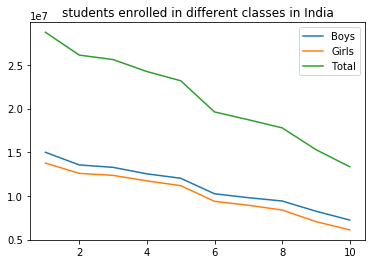

In [38]:
enrollment.plot(title = 'students enrolled in different classes in India')

The graph shows the rapid decline in the number of students enrolled in schools on the y axis as the grade progresses on the x axis!

It's clear right from here that girls are enrolled in much lesser numbers than boys, but let us explore these trends more closely

#### Dropout Patterns

let us compute the percentage amount by which the enrollment decreases each grade after the other!

In [39]:
enrollment.pct_change()

,Boys,Girls,Total
1,NaN,NaN,NaN
2,-0.096456,-0.085111,-0.091029
3,-0.020728,-0.018430,-0.019622
4,-0.055852,-0.050988,-0.053507
5,-0.040456,-0.046895,-0.043568
6,-0.147931,-0.160657,-0.154061
7,-0.043548,-0.047744,-0.045554
8,-0.038948,-0.061385,-0.049647
9,-0.124279,-0.158326,-0.140314
10,-0.122777,-0.134926,-0.128379


In [40]:
fraction_dropouts = enrollment.pct_change().dropna() * -1
fraction_dropouts


,Boys,Girls,Total
2,0.096456,0.085111,0.091029
3,0.020728,0.018430,0.019622
4,0.055852,0.050988,0.053507
5,0.040456,0.046895,0.043568
6,0.147931,0.160657,0.154061
7,0.043548,0.047744,0.045554
8,0.038948,0.061385,0.049647
9,0.124279,0.158326,0.140314
10,0.122777,0.134926,0.128379


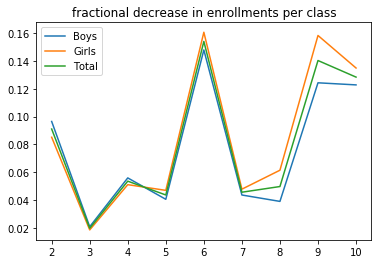

In [41]:
fraction_dropouts.plot(title = 'fractional decrease in enrollments per class')

#### Observations

 - The percentage change in number of students enrolled across grades is almost same until the 6th grade, from there on a lot more girls start dropping out then boys, 
 - the difference although is of 2 to 3 %, it becomes significant when it is a 2 to 3 percent of a crore girls.

##### 6th grade to 9th grade is usually the time when girls  start drop out from schools, for this trend, let us verify this with some more analysis

#### Sanitation facilities in Indian schools

Let us see how many schools have toilets and weather that has an effect on retaining girls through higher classes.
The data for this analysis is again spread across 3 different excel sheets. Let us combine and preprocess this data

In [43]:
# First reading the data from all the sheets
facilities_primary = pd.read_excel('data/facilities_primary.xls')
facilities_secondary = pd.read_excel('data/facilities_secondary.xls')
facilities_u_primary = pd.read_excel('data/facilities_upper_primary.xls')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [44]:
facilities_primary.head(1)

,Sl. No.,STATE/U.T.,Availability Within School Premises - Drinking Water,Availability Within School Premises - Usable Urinal,Availability Within School Premises - Playground
0,1,Andaman Nicobar Islands,166,143,104


In [45]:
facilities_primary.tail(1)

,Sl. No.,STATE/U.T.,Availability Within School Premises - Drinking Water,Availability Within School Premises - Usable Urinal,Availability Within School Premises - Playground
35,INDIA,INDIA,610946,534300,360819


In [46]:
facilities_secondary.head(1)

,Sl. No.,STATE/U.T.,Availability Within School Premises - Drinking Water,Availability Within School Premises - Usable Urinal,Availability Within School Premises - Playground
0,1,Andaman Nicobar Islands,44,41,26


In [47]:
facilities_u_primary.head(1)

,Sl. No.,STATE/U.T.,Availability Within School Premises - Drinking Water,Availability Within School Premises - Usable Urinal,Availability Within School Premises - Playground
0,1,Andaman Nicobar Islands,62,61,42


In [48]:
facilities_primary.columns

Index(['Sl. No.', 'STATE/U.T.',
       'Availability Within School Premises - Drinking Water',
       'Availability Within School Premises - Usable Urinal',
       'Availability Within School Premises - Playground'],
      dtype='object')

We can see the number of schools with toilets in different states. But we shall need to combine it with more information in order to draw some insights.

Let us find the total number of schools in each state, we will need to extract this information from a different file!

In [51]:
# Extracting and combining the information on _toilets
schools_with_toilets = facilities_primary['Availability Within School Premises - Usable Urinal'] +facilities_secondary['Availability Within School Premises - Usable Urinal'] + facilities_u_primary['Availability Within School Premises - Usable Urinal']


schools_with_toilets.index = facilities_primary['STATE/U.T.']

schools_with_toilets

STATE/U.T.
Andaman  Nicobar Islands       245
Andhra Pradesh               64830
Arunachal Pradesh             1346
Assam                        30016
Bihar                        26523
Chandigarh                     110
Chhattisgarh                 30114
Dadra  Nagar Haveli            146
Daman  Diu                      89
Delhi                         3580
Goa                           1144
Gujarat                      40142
Haryana                      14683
Himachal Pradesh              9947
Jammu  Kashmir                8438
Jharkhand                    24230
Karnataka                    56001
Kerala                       11111
Lakshadweep                     29
Madhya Pradesh               90222
Maharashtra                  81736
Manipur                       1972
Meghalaya                     4873
Mizoram                       2383
Nagaland                      1986
Orissa                       43338
Puducherry                     563
Punjab                       20774
Rajasthan

In [52]:
school_category = pd.read_excel('data/school_category.xls')

# Subtracting the high school students (as we are only analysing trends 
#till class 10)
total_schools = school_category['Total Schools\nof Schools'] - 
school_category['Higher Secondary Schools']
total_schools.index = school_category['STATE/U.T.']

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [54]:
total_schools

STATE/U.T.
Andaman  Nicobar Islands        319
Andhra Pradesh                97336
Arunachal Pradesh              2909
Assam                         44137
Bihar                         68761
Chandigarh                      111
Chhattisgarh                  50107
Dadra  Nagar Haveli             292
Daman  Diu                      101
Delhi                          3621
Goa                            1473
Gujarat                       42407
Haryana                       16031
Himachal Pradesh              15076
Jammu  Kashmir                24592
Jharkhand                     39979
Karnataka                     66316
Kerala                        11321
Lakshadweep                      33
Madhya Pradesh               126661
Maharashtra                   89951
Manipur                        3740
Meghalaya                     10206
Mizoram                        2959
Nagaland                       2442
Orissa                        62019
Puducherry                      597
Punjab           

In [55]:
total_schools

STATE/U.T.
Andaman  Nicobar Islands        319
Andhra Pradesh                97336
Arunachal Pradesh              2909
Assam                         44137
Bihar                         68761
Chandigarh                      111
Chhattisgarh                  50107
Dadra  Nagar Haveli             292
Daman  Diu                      101
Delhi                          3621
Goa                            1473
Gujarat                       42407
Haryana                       16031
Himachal Pradesh              15076
Jammu  Kashmir                24592
Jharkhand                     39979
Karnataka                     66316
Kerala                        11321
Lakshadweep                      33
Madhya Pradesh               126661
Maharashtra                   89951
Manipur                        3740
Meghalaya                     10206
Mizoram                        2959
Nagaland                       2442
Orissa                        62019
Puducherry                      597
Punjab           

In [137]:
total_schools.head()

STATE/U.T.
Andaman  Nicobar Islands    319
dtype: int64

In [138]:

# adding this information to a new dataframe
school_sanitation = pd.DataFrame()
school_sanitation['overall'] = total_schools
school_sanitation['with_toilets'] = schools_with_toilets

In [139]:
school_sanitation.head(3)

,overall,with_toilets
STATE/U.T.,,
Andaman Nicobar Islands,319,245
Andhra Pradesh,97336,64830
Arunachal Pradesh,2909,1346


Now that we have the total number of schools as well as number of schools with toilets, let us compute the fraction of schools with toilets

In [140]:
school_sanitation['fraction_with_toilets'] = 
school_sanitation['with_toilets']/school_sanitation['overall']

In [141]:
school_sanitation.head()

,overall,with_toilets,fraction_with_toilets
STATE/U.T.,,,
Andaman Nicobar Islands,319,245,0.768025
Andhra Pradesh,97336,64830,0.666043
Arunachal Pradesh,2909,1346,0.462702
Assam,44137,30016,0.680064
Bihar,68761,26523,0.385727


Let us check the correlation between the fraction of girls that are retained through class 1 to 10 and the fraction of schools with toilets across every state!

In [142]:
# fraction of girls retained from class 1st to 10th
girls_retained = all_grades['Enrolment in Class X - Girls'] /
all_grades['Enrolment in Class I - Girls']
girls_retained.index = all_grades['STATE/U.T.']

school_sanitation['girls_retained'] = girls_retained

In [143]:
school_sanitation.head(3)

,overall,with_toilets,fraction_with_toilets,girls_retained
STATE/U.T.,,,,
Andaman Nicobar Islands,319,245,0.768025,0.834931
Andhra Pradesh,97336,64830,0.666043,0.671470
Arunachal Pradesh,2909,1346,0.462702,0.306847


In [144]:
girls_retained.corr(school_sanitation['fraction_with_toilets'])

0.4830066251850743

A correlation of ~0.5 can not be ignored, the fraction of schools having toilets does have an impact on the fraction of girls a state is able to retain through higher classes! This trend can also be spotted in the graph below

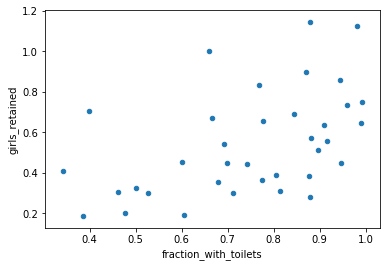

In [145]:
school_sanitation.plot.scatter('fraction_with_toilets','girls_retained')

#### Conclusion
The difference between dropout rates of girls and boys in Indian schools is a real problem. A simple solution such as having a proper toilet in the school helps address this issue! 

Schemes like the mid day meal programmes help attract students to schools but in order to retain them, better hygeine facilities need to be given equal importance!